## Import libraries

In [1]:
! pip install shap
! pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 13.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=1ec24baf6dd5f8196fb97f3866b849cd41b54ab550d7ac3118092e4ae54d73be
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [2]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import shap
# import keras.backend as K
import json

import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from skimage.segmentation import mark_boundaries

In [3]:
# from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
import keras.utils as image
from keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.utils import img_to_array
from skimage.io import imread
import matplotlib.pyplot as plt
import lime
from lime import lime_image


In [4]:
def reshape_img(to_explain):
  img = image.img_to_array(to_explain)
  img = np.expand_dims(img, axis=0)
  return(img)

def normalize_img(to_explain):
  norm_img = image.img_to_array(to_explain)# Transforming the image to get the shape as [channel, height, width]
  norm_img = np.expand_dims(norm_img, axis=0) # Adding dimension to convert array into a batch of size (1,299,299,3)
  norm_img = norm_img/255.0
  return(norm_img)


In [5]:
def generate_prediction_sample(exp, exp_class, weight = 0.001, show_positive = True, hide_background = True):
    #weight = 0.1, 0.01
    '''
    Method to display and highlight super-pixels used by the black-box model to make predictions
    '''
    image, mask = exp.get_image_and_mask(exp_class, 
                                         positive_only=show_positive, 
                                         num_features=6, 
                                         hide_rest=hide_background,
                                         min_weight=weight
                                        )
    # return(mark_boundaries(image, mask))
    plt.imshow(mark_boundaries(image, mask))
    plt.title(str(top5_pred[0]), fontsize=14)
    plt.axis('off')
    plt.show()

def explanation_heatmap(exp, exp_class,image_no, top_prediction):
    '''
    Using heat-map to highlight the importance of each super-pixel for the model prediction
    '''
    dict_heatmap = dict(exp.local_exp[exp_class])
    heatmap = np.vectorize(dict_heatmap.get)(exp.segments) 
    plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
    plt.colorbar()
    plt.title(str(top_prediction), fontsize=14)
    plt.savefig('heatmap_' + str(image_no)+'.png')

In [6]:
import os

! pwd
os.chdir('/content/drive/MyDrive/xml_lime')
! pwd

/content
/content/drive/MyDrive/xml_lime


## VGG

In [7]:
# load pre-trained model and choose two images to explain
model_vgg16 = VGG16(weights='imagenet', include_top=True)

X,y = shap.datasets.imagenet50()
# to_explain = X[[39,41]]

553467096/553467096 [==============================] - 5s 0us/step


  0%|          | 0/10 [00:00<?, ?it/s]

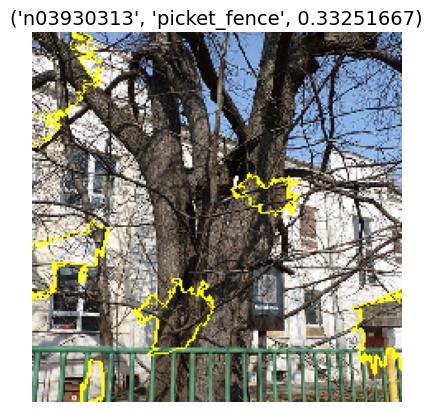

  0%|          | 0/10 [00:00<?, ?it/s]

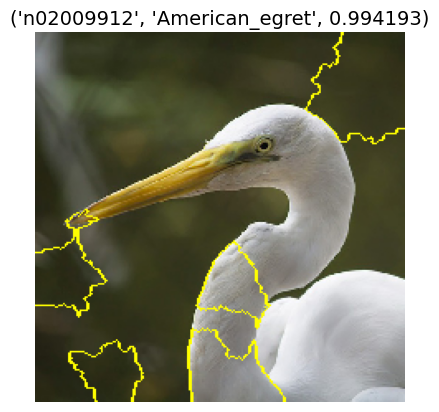

<Figure size 640x480 with 0 Axes>

In [20]:
for i in range(0,5):
  to_explain = X[i]

  img = reshape_img(to_explain)
  norm_img =normalize_img(to_explain)

  model_prediction = model_vgg16.predict(img)
  top5_pred = decode_predictions(model_prediction, top=5)[0]

  explainer = lime_image.LimeImageExplainer()

  exp = explainer.explain_instance(norm_img[0],
                                model_vgg16.predict, 
                                top_labels=5, 
                                hide_color=0, 
                                num_samples=10)

  # #lime explanations  
  #taking the top label, we look at areas of the image that was used to predict this label 
  # plt.imshow(exp.segments)
  # plt.axis('off')
  # plt.title(str(top5_pred[0]), fontsize=14)
  

  #super pixel explanations
  top_segments= generate_prediction_sample(exp, exp.top_labels[0], show_positive = True, hide_background = False)
  # plt.imshow(top_segments)
  # plt.title(str(top5_pred[0]), fontsize=14)
  # plt.savefig('test_top_seg_' + str(i)+'.png')
  plt.savefig('lime_vgg16_'+str(i)+'.png')


  # plt.savefig('shap_densenet121_' +str(i)+ '.png')

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


35363/35363 [==============================] - 0s 0us/step


  0%|          | 0/10 [00:00<?, ?it/s]

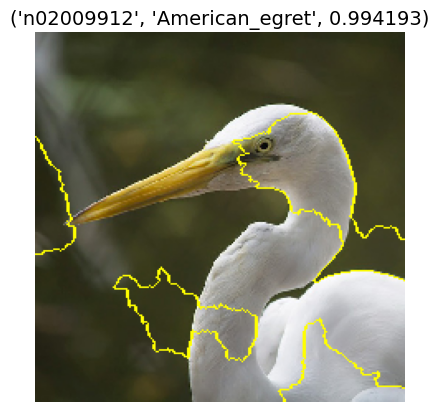

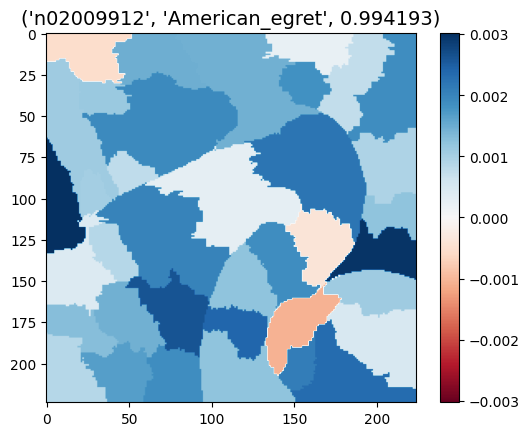

In [8]:
# for i in range(1, 2):

i=1
to_explain = X[1]
img = reshape_img(to_explain)
norm_img =normalize_img(to_explain)

model_prediction = model_vgg16.predict(img)
top5_pred = decode_predictions(model_prediction, top=5)[0]

explainer = lime_image.LimeImageExplainer()

exp = explainer.explain_instance(norm_img[0],
                              model_vgg16.predict, 
                              top_labels=5, 
                              hide_color=0, 
                              num_samples=10)

# #lime explanations  
#taking the top label, we look at areas of the image that was used to predict this label 
plt.imshow(exp.segments)
plt.axis('off')
plt.title(str(top5_pred[0]), fontsize=14)
# plt.savefig('lime_segment_'+str(i)+'.png')

#super pixel explanations
top_segments= generate_prediction_sample(exp, exp.top_labels[0], show_positive = True, hide_background = False)
# plt.imshow(top_segments)
plt.title(str(top5_pred[0]), fontsize=14)
# plt.savefig('test_top_seg_' + str(i)+'.png')

#heatmap explanations
heatmap = explanation_heatmap(exp, exp.top_labels[0], i, top5_pred[0])


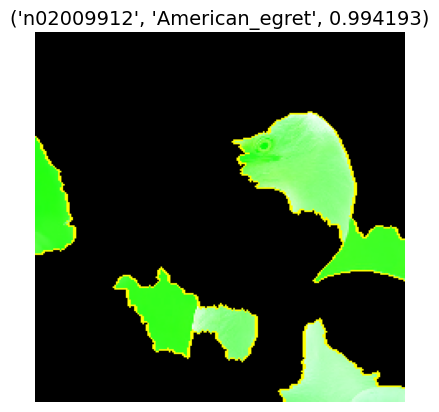

In [13]:
# generate_prediction_sample(exp, exp.top_labels[0], show_positive = True, hide_background = True)
# generate_prediction_sample(exp, exp.top_labels[0], show_positive = True, hide_background = False) #--> shows segmentation of super pixels with background
# generate_prediction_sample(exp, exp.top_labels[0], show_positive = False, hide_background = False)

generate_prediction_sample(exp, 
                           exp.top_labels[0], 
                           show_positive = False, 
                           hide_background = True)

Resnet50

In [14]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [15]:
model = ResNet50(weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.


102967424/102967424 [==============================] - 5s 0us/step


  0%|          | 0/10 [00:00<?, ?it/s]

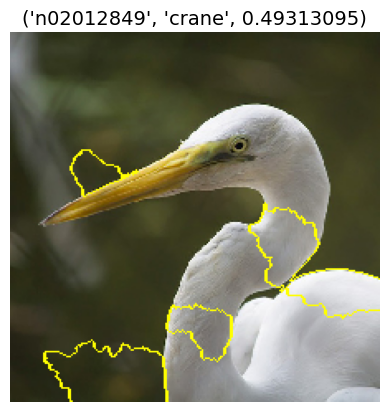

TypeError: ignored

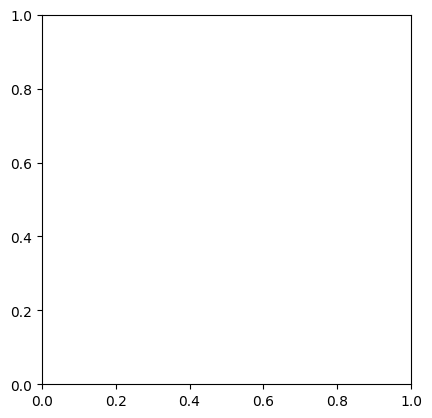

In [ ]:
for i in range(1, 2):
    to_explain = X[i]
    img = reshape_img(to_explain)
    norm_img =normalize_img(to_explain)

    model_prediction = model.predict(img)
    top5_pred = decode_predictions(model_prediction, top=5)[0]

    explainer = lime_image.LimeImageExplainer()

    exp = explainer.explain_instance(norm_img[0],
                                    model.predict, 
                                    top_labels=5, 
                                    hide_color=0, 
                                    num_samples=10)

    # #lime explanations  
    #taking the top label, we look at areas of the image that was used to predict this label 
    plt.imshow(exp.segments)
    plt.axis('off')
    plt.title(str(top5_pred[0]), fontsize=14)
    plt.savefig('lime_segment_'+str(i)+'.png')

    #super pixel explanations
    top_segments= generate_prediction_sample(exp, exp.top_labels[0], show_positive = True, hide_background = False)
    plt.imshow(top_segments)
    plt.title(str(top5_pred[0]), fontsize=14)
    plt.savefig('test_top_seg_' + str(i)+'.png')

    #heatmap explanations
    heatmap = explanation_heatmap(exp, exp.top_labels[0], i, top5_pred[0])


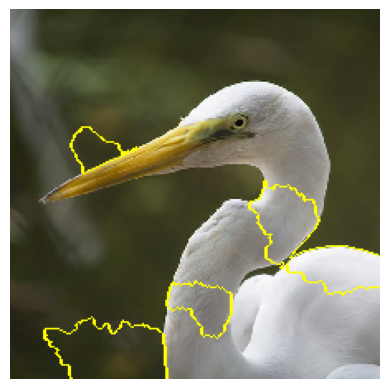

Text(0.5, 1.0, "('n02012849', 'crane', 0.49313095)")

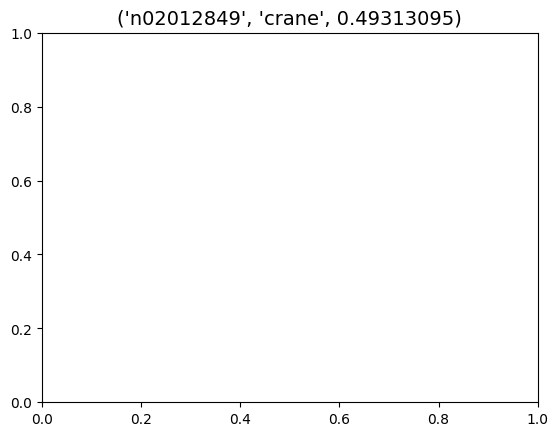

In [ ]:
generate_prediction_sample(exp, exp.top_labels[0], show_positive = True, hide_background = False)
